In [1]:
# ! pip install matplotlib
# ! pip install pandas
# ! pip install scikit-learn
# ! pip install torch
# ! pip install mlflow

In [2]:
import os
import sys

BASE_DIR = "../"
BASE_DIR = f"{os.path.abspath(BASE_DIR)}/"
sys.path.append(f"{BASE_DIR}")
BASE_DIR

'/Users/jkn/Documents/Projects/university/ML_shorts/'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [4]:
class Adaline:
    def __init__(self, l_rate = 0.01, n_iter = 100):
        self.l_rate = l_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        self.weights = torch.randn(X.shape[1], 
                                   dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)
        
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            error = y - y_pred
            self.weights += self.l_rate * torch.matmul(X.T, error)
            self.bias += self.l_rate * error.sum()   

            
    def predict(self, X):
        return torch.matmul(X, self.weights) + self.bias

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

X = df.iloc[0:100,[0,2]].values
y = iris.target[0:100]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_tensor = torch.tensor(X_standardized, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

indices = torch.randperm(X_tensor.size(0))
train_size = int(0.7* len(X_tensor))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, X_test = X_tensor[train_indices], X_tensor[test_indices]
y_train, y_test = y_tensor[train_indices], y_tensor[test_indices]

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


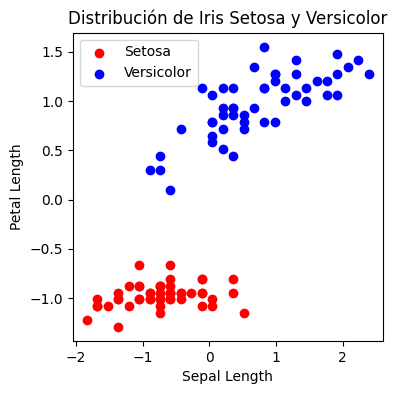

In [7]:
X_np = X_tensor.numpy()
y_np = y_tensor.numpy()

plt.figure(figsize=(4, 4))

plt.scatter(X_np[y_np == 0, 0], X_np[y_np == 0, 1], color='red', label='Setosa')
plt.scatter(X_np[y_np == 1, 0], X_np[y_np == 1, 1], color='blue', label='Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Distribución de Iris Setosa y Versicolor')

plt.legend()
plt.show()

In [8]:
adaline = Adaline()
adaline.fit(X_train,y_train)

In [9]:
y_pred = adaline.predict(X_test)
y_pred = torch.round(y_pred)

In [10]:
accuracy = (y_pred == y_test).float().mean()
print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 100.00%
